In [158]:
#next line is another way to install imblearn without using terminal
!pip3 install imblearn
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")

PCOS = pd.read_csv("PCOS.csv")
PCOS.columns

Index(['Sl. No', 'Patient File No.', 'PCOS (Y/N)', 'Age (yrs)', 'Weight (Kg)',
       'Height(Cm)', 'BMI', 'Blood Group', 'Pulse rate(bpm)',
       'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)',
       'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of aborptions',
       '  I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)',
       'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio',
       'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)',
       'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)',
       'Unnamed: 44'],
      dtype='object')

## Data Cleaning

In [156]:
data = PCOS.loc[:, ["PCOS (Y/N)", "Age (yrs)", "Weight (Kg)", "Height(Cm)", "Pulse rate(bpm)", "RR (breaths/min)", "Marraige Status (Yrs)", 'Fast food (Y/N)', "Pregnant(Y/N)", "No. of aborptions", "Hip(inch)", "Waist(inch)", "Reg.Exercise(Y/N)", "Cycle(R/I)", "hair growth(Y/N)", "Pimples(Y/N)", "Blood Group"]]
data["H/W Ratio"] = data["Hip(inch)"]/data["Waist(inch)"]
data["Height(M)"] = data["Height(Cm)"]/100
data["BMI"] = data["Weight (Kg)"]/np.square(data["Height(M)"])
data = data.reindex(columns=["PCOS (Y/N)", "Age (yrs)", "Weight (Kg)", "Height(Cm)", "BMI", "Pulse rate(bpm)", "RR (breaths/min)", "Marraige Status (Yrs)", 'Fast food (Y/N)', "Pregnant(Y/N)", "No. of aborptions", "H/W Ratio", "Reg.Exercise(Y/N)", "Cycle(R/I)", "hair growth(Y/N)", "Pimples(Y/N)", "Blood Group"])
missing_cols = data.columns[data.isna().any()].tolist()
for x in missing_cols:
    data[x] = data[x].fillna(data[x].mean())

## SMOTE

In [54]:
data["PCOS (Y/N)"].value_counts()

0    364
1    177
Name: PCOS (Y/N), dtype: int64

In [55]:
X=data.iloc[:,1:]
X.isnull().sum()
y=data.iloc[:,0]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 20)

In [56]:
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 142
Before OverSampling, counts of label '0': 290 

After OverSampling, the shape of train_X: (580, 16)
After OverSampling, the shape of train_y: (580,) 

After OverSampling, counts of label '1': 290
After OverSampling, counts of label '0': 290


In [57]:
y = pd.DataFrame(y_train_res, columns=["PCOS (Y/N)"])

In [58]:
data = pd.concat([X_train_res, y], axis = 1) 
data = data.reindex(columns=["PCOS (Y/N)", "Age (yrs)", "Weight (Kg)", "Height(Cm)", "BMI", "Pulse rate(bpm)", "RR (breaths/min)", "Marraige Status (Yrs)", 'Fast food (Y/N)', "Pregnant(Y/N)", "No. of aborptions", "H/W Ratio", "Reg.Exercise(Y/N)", "Cycle(R/I)", "hair growth(Y/N)", "Pimples(Y/N)", "Blood Group"])
data = data.rename(columns={"PCOS (Y/N)":"PCOS", "Age (yrs)":"age", "Weight (Kg)": "weight", "Height(Cm)": "height", "Pulse rate(bpm)": "pulse_rate", "RR (breaths/min)": "RR", "Marraige Status (Yrs)": "marriage_years", 'Fast food (Y/N)': "fast_food", "Pregnant(Y/N)": "pregnant", "No. of aborptions": "number_abortions", "H/W Ratio": "h/w_ratio", "Reg.Exercise(Y/N)": "regular_excercise", "Cycle(R/I)": "cycle", "hair growth(Y/N)": "hair_growth", "Pimples(Y/N)": "pimples"})
data.head()

,PCOS,age,weight,height,BMI,pulse_rate,RR,marriage_years,fast_food,pregnant,number_abortions,h/w_ratio,regular_excercise,cycle,hair_growth,pimples,Blood Group
0,0,33,58.5,159.000,23.139907,72,20,13.0,0.0,1,2,1.157895,0,2,0,0,13
1,1,27,50.0,168.000,17.715420,72,18,7.0,0.0,0,0,1.040000,0,4,1,1,13
2,0,38,70.0,164.592,25.839291,72,18,8.0,0.0,0,0,1.095238,0,2,1,1,16
3,0,34,60.0,156.000,24.654832,74,20,7.0,0.0,0,0,1.218750,0,2,0,0,14
4,1,31,50.0,158.000,20.028842,74,20,11.0,1.0,0,0,1.200000,1,2,0,1,11


In [59]:
data.shape

(580, 17)

## EDA

### Focused on interaction terms mainly (baseline at 75.5%)

In [78]:
def confusion_matrix_train(model,cutoff=0.5):
    # Confusion matrix
    cm_df = pd.DataFrame(model.pred_table(threshold = cutoff))
    #Formatting the confusion matrix
    cm_df.columns = ['Predicted 0', 'Predicted 1'] 
    cm_df = cm_df.rename(index={0: 'Actual 0',1: 'Actual 1'})
    cm = np.array(cm_df)
    # Calculate the accuracy
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
    sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
    plt.ylabel("Actual Values")
    plt.xlabel("Predicted Values")
    print("Classification accuracy = {:.1%}".format(accuracy))

### Interacting hair growth and age

In [85]:
model11 = smf.logit(formula = 'PCOS~(age*cycle)+weight+(fast_food*BMI)+(age*hair_growth)+pregnant+marriage_years', data = data).fit()
model11.summary()

Optimization terminated successfully.
         Current function value: 0.500797
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   PCOS   No. Observations:                  580
Model:                          Logit   Df Residuals:                      568
Method:                           MLE   Df Model:                           11
Date:                Sat, 25 Feb 2023   Pseudo R-squ.:                  0.2775
Time:                        02:55:15   Log-Likelihood:                -290.46
converged:                       True   LL-Null:                       -402.03
Covariance Type:            nonrobust   LLR p-value:                 1.152e-41
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           6.7607      2.275      2.971      0.003       2.301      11.220
age                -0.2947      0.067     -4.394      0.000      -0.426      -0.163
cycle              -1.7396      0.707     -2.460      0.014      -3.125      -0.354
age:cycle           0.0765      0.023      3.369      0.001       0.032       0.121
weight              0.0155      0.023      0.675      0.500      -0.030       0.061
fast_food          -0.7461      1.445     -0.516      0.606      -3.579       2.087
BMI                -0.0529      0.071     -0.747      0.455      -0.192       0.086
fast_food:BMI       0.0898      0.060      1.507      0.132      -0.027       0.207
hair_growth         2.8575      1.546      1.849      0.065      -0.172       5.887
age:hair_growth    -0.0568      0.050     -1.142      0.254      -0.154       0.041
pregnant           -0.6731      0.222     -3.030      0.002      -1.108      -0.238
marriage_years      0.0180      0.033      0.551      0.582      -0.046       0.082
===================================================================================
"""

Classification accuracy = 76.0%


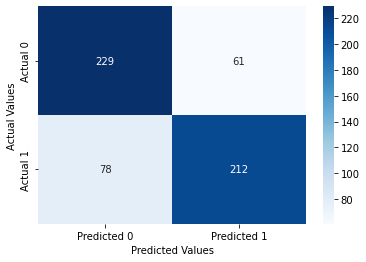

In [86]:
confusion_matrix_train(model11)

Interacting age and hair growth (maybe be correlated with more hair at higher age?) increases accuracy to 76%. 

### Interacting fast food and weight (removing BMI)

In [87]:
model12 = smf.logit(formula = 'PCOS~(age*cycle)+(fast_food*weight)+(age*hair_growth)+pregnant+marriage_years', data = data).fit()
model12.summary()

Optimization terminated successfully.
         Current function value: 0.497562
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   PCOS   No. Observations:                  580
Model:                          Logit   Df Residuals:                      569
Method:                           MLE   Df Model:                           10
Date:                Sat, 25 Feb 2023   Pseudo R-squ.:                  0.2822
Time:                        03:00:34   Log-Likelihood:                -288.59
converged:                       True   LL-Null:                       -402.03
Covariance Type:            nonrobust   LLR p-value:                 3.875e-43
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            7.5830      2.268      3.343      0.001       3.138      12.028
age                 -0.3006      0.067     -4.459      0.000      -0.433      -0.168
cycle               -1.7810      0.712     -2.502      0.012      -3.176      -0.386
age:cycle            0.0779      0.023      3.412      0.001       0.033       0.123
fast_food           -1.7321      1.307     -1.325      0.185      -4.294       0.829
weight              -0.0177      0.018     -1.002      0.316      -0.052       0.017
fast_food:weight     0.0536      0.022      2.424      0.015       0.010       0.097
hair_growth          2.9023      1.552      1.871      0.061      -0.139       5.943
age:hair_growth     -0.0580      0.050     -1.161      0.246      -0.156       0.040
pregnant            -0.6714      0.222     -3.024      0.002      -1.107      -0.236
marriage_years       0.0193      0.033      0.593      0.553      -0.044       0.083
====================================================================================
"""

Classification accuracy = 75.9%


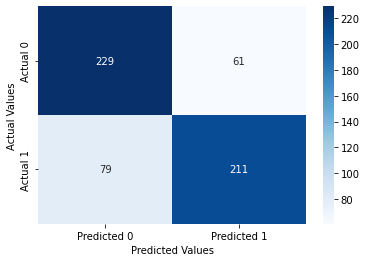

In [88]:
confusion_matrix_train(model12)

Interacting age and hair growth (maybe be correlated with more hair at higher age?) increases accuracy to 75.9%. 

In [90]:
model13 = smf.logit(formula = 'PCOS~(cycle*age)+(BMI*fast_food)+hair_growth+cycle+(pregnant*marriage_years)+(cycle*marriage_years)', data = data).fit()
model13.summary()

Optimization terminated successfully.
         Current function value: 0.502299
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   PCOS   No. Observations:                  580
Model:                          Logit   Df Residuals:                      568
Method:                           MLE   Df Model:                           11
Date:                Sat, 25 Feb 2023   Pseudo R-squ.:                  0.2753
Time:                        03:04:27   Log-Likelihood:                -291.33
converged:                       True   LL-Null:                       -402.03
Covariance Type:            nonrobust   LLR p-value:                 2.658e-41
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   6.9007      2.513      2.746      0.006       1.975      11.826
cycle                      -1.6312      0.824     -1.981      0.048      -3.246      -0.017
age                        -0.2944      0.089     -3.304      0.001      -0.469      -0.120
cycle:age                   0.0731      0.032      2.286      0.022       0.010       0.136
BMI                        -0.0193      0.046     -0.419      0.676      -0.109       0.071
fast_food                  -0.8681      1.443     -0.602      0.547      -3.696       1.960
BMI:fast_food               0.0956      0.060      1.605      0.108      -0.021       0.212
hair_growth                 1.1384      0.252      4.509      0.000       0.644       1.633
pregnant                   -0.7189      0.414     -1.735      0.083      -1.531       0.093
marriage_years              0.0123      0.100      0.123      0.902      -0.184       0.208
pregnant:marriage_years     0.0099      0.050      0.200      0.842      -0.087       0.107
cycle:marriage_years       -0.0016      0.036     -0.045      0.964      -0.072       0.069
===========================================================================================
"""

Classification accuracy = 77.1%


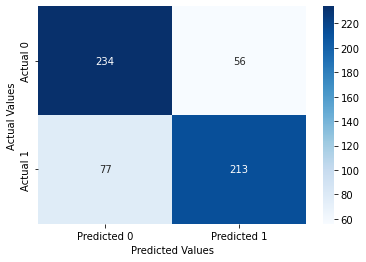

In [91]:
confusion_matrix_train(model13)

Hit the previous high of 77.1% also adding an interaction term between marriage years and cycle, all others held equal in original doc.

## Using Observable Variables

In [232]:
ob_vars = PCOS.loc[:, ["PCOS (Y/N)", "Age (yrs)", "Weight (Kg)",
       'Height(Cm)','Pregnant(Y/N)', 'Hip(inch)', 'Waist(inch)', 'BMI',
                    'Weight gain(Y/N)',
                    "hair growth(Y/N)", 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', "Pimples(Y/N)"]]

In [233]:
ob_vars

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),Pregnant(Y/N),Hip(inch),Waist(inch),BMI,Weight gain(Y/N),hair growth(Y/N),hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N)
0,0,28,44.6,152.000,0,36,30,19.3,0,0,0,0,0,0
1,0,36,65.0,161.500,1,38,32,#NAME?,0,0,0,0,0,0
2,1,33,68.8,165.000,1,40,36,#NAME?,0,0,0,0,1,1
3,0,37,65.0,148.000,0,42,36,#NAME?,0,0,0,0,0,0
4,0,25,52.0,161.000,1,37,30,#NAME?,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,0,35,50.0,164.592,0,28,26,18.5,0,0,0,0,0,0
537,0,30,63.2,158.000,1,34,32,25.3,1,0,0,0,0,0
538,0,36,54.0,152.000,0,30,28,23.4,0,0,0,0,0,0
539,0,27,50.0,150.000,0,28,26,22.2,0,0,0,0,0,1


In [234]:
cleaned_ob_vars = ob_vars[~ob_vars['Age (yrs)'].isnull()]

In [235]:
obs = cleaned_ob_vars.rename(columns={"PCOS (Y/N)":"PCOS", 
       'Height(Cm)':'height', 'Hip(inch)': 'hip', 'Waist(inch)': 'waist', 
                    "hair growth(Y/N)": "hair_growth",
       'Skin darkening (Y/N)': 'skin_darkening', 'Hair loss(Y/N)': 'hair_loss', "Pimples(Y/N)": "pimples"})

In [236]:
obs

,PCOS,Age (yrs),Weight (Kg),height,Pregnant(Y/N),hip,waist,BMI,Weight gain(Y/N),hair_growth,hair_growth,skin_darkening,hair_loss,pimples
0,0,28,44.6,152.000,0,36,30,19.3,0,0,0,0,0,0
1,0,36,65.0,161.500,1,38,32,#NAME?,0,0,0,0,0,0
2,1,33,68.8,165.000,1,40,36,#NAME?,0,0,0,0,1,1
3,0,37,65.0,148.000,0,42,36,#NAME?,0,0,0,0,0,0
4,0,25,52.0,161.000,1,37,30,#NAME?,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,0,35,50.0,164.592,0,28,26,18.5,0,0,0,0,0,0
537,0,30,63.2,158.000,1,34,32,25.3,1,0,0,0,0,0
538,0,36,54.0,152.000,0,30,28,23.4,0,0,0,0,0,0
539,0,27,50.0,150.000,0,28,26,22.2,0,0,0,0,0,1


Variables already covered: 

height
pimples
hair_growth 
PCOS

Variables needed: 

Hip
Waist
Hair loss
skin darkening

In [238]:
needed = obs.loc[:, ["hip", "waist", 'hair_loss', "skin_darkening"]]
needed

,hip,waist,hair_loss,skin_darkening
0,36,30,0,0
1,38,32,0,0
2,40,36,1,0
3,42,36,0,0
4,37,30,1,0
...,...,...,...,...
536,28,26,0,0
537,34,32,0,0
538,30,28,0,0
539,28,26,0,0


### Binning hip and waist into categorical variables

In [227]:
#binned_waist = pd.qcut(needed['waist'], 39, retbins=True)
#needed['binned_waist'] = binned_waist[0]

ValueError: Bin edges must be unique: array([24.        , 26.        , 28.        , 29.        , 30.        ,
       30.        , 30.        , 31.        , 32.        , 32.        ,
       32.        , 32.        , 32.        , 32.        , 32.        ,
       33.        , 33.        , 33.38461538, 34.        , 34.        ,
       34.        , 34.        , 34.        , 34.        , 35.        ,
       35.        , 35.        , 35.        , 36.        , 36.        ,
       36.        , 36.        , 37.        , 37.        , 38.        ,
       38.        , 39.        , 40.        , 42.        , 47.        ]).
You can drop duplicate edges by setting the 'duplicates' kwarg

In [230]:
#binned_hip = pd.qcut(needed['hip'], 11, retbins=True)
#needed['binned_hip'] = binned_hip[0]

### Looking at observational variables

In [244]:
model1 = smf.logit("PCOS~height+pimples+hip+waist+hair_loss+skin_darkening", data = obs).fit()
model1.summary()

Optimization terminated successfully.
         Current function value: 0.478088
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   PCOS   No. Observations:                  541
Model:                          Logit   Df Residuals:                      534
Method:                           MLE   Df Model:                            6
Date:                Sat, 25 Feb 2023   Pseudo R-squ.:                  0.2437
Time:                        04:43:10   Log-Likelihood:                -258.65
converged:                       True   LL-Null:                       -342.00
Covariance Type:            nonrobust   LLR p-value:                 2.249e-33
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -5.7238      2.857     -2.003      0.045     -11.324      -0.124
height            -0.0039      0.019     -0.211      0.833      -0.040       0.032
pimples            1.1529      0.229      5.034      0.000       0.704       1.602
hip                0.0622      0.060      1.034      0.301      -0.056       0.180
waist              0.0479      0.064      0.745      0.456      -0.078       0.174
hair_loss          0.4356      0.222      1.963      0.050       0.001       0.871
skin_darkening     2.1146      0.227      9.332      0.000       1.671       2.559
==================================================================================
"""

Classification accuracy = 79.3%


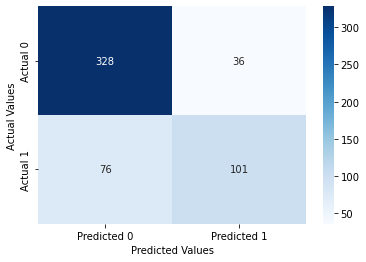

In [246]:
confusion_matrix_train(model1)